In [4]:
#import specdist as pi
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.interpolate import interp1d
from matplotlib.pyplot import cm
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.collections import LineCollection
from matplotlib.ticker import LogLocator


from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

import warnings; warnings.simplefilter('ignore')

path_to_figures = "/Users/boris/Work/SPECTRAL-DISTORTIONS/figures/"

xinj_to_mass = 4.698e-4 #m in ev = 4.698e-4 xinj



label_y_firas = r'$y_\mathrm{COBE}=1.5\times 10^{-5}$'
label_mu_firas = r'$\mu_\mathrm{COBE}=9\times 10^{-5}$'
label_fdm = 'Effective Dark Matter Fraction, '+r'$\epsilon f_\mathrm{dm}$'
label_mdm = 'Particle Mass, ' +r'$m_\mathrm{dm}\,\,[\mathrm{eV}]$'
label_xe = 'Free Electron Fraction, '+r'$X_\mathrm{e}$'
label_redshift = 'Redshift, '+r'$z$'
label_mu_dist =  'Chemical Potential, '+r'$\mu$'
label_injection_frequency = "Scaled Injection Frequency, "+ r'$x_{\mathrm{inj,0}}$'
label_scaled_frequency = "Scaled Frequency, "+ r'$x=h\nu/k_{_\mathrm{B}}T_{_\mathrm{CMB}}$'
label_frequency_in_GHz = "Frequency,  "+ r'$\nu \quad [\mathrm{GHz}]$'
label_intensity = "Intensity, "+r'$\Delta I_x \quad [\mathrm{Jy/sr}]$'
label_intensity_kJy = "Intensity, "+r'$\Delta I_x \quad [\mathrm{kJy/sr}]$'
label_injection_energy = "Injection Energy, "+ r'$E_{\mathrm{inj,0}}$' + " [eV]"
xinj_to_Einj = 4.698e-4/2.
label_Gamma = "Decay Rate, "+r"$\Gamma_X\quad[\mathrm{s^{-1}}]$"

label_zX = "Maximum Injection Redshift, "+ r'$z_X$'
# sd = pi

label_Gamma_stim = r"$\Gamma_X^\mathrm{stim}/\Gamma_X=[1+2n_\mathrm{Pl}(x_\mathrm{inj})]$"

label_zX = "Maximum Injection Redshift, "+ r'$z_X$'
label_Tau_x = "Lifetime,  "+r'$\tau_X\quad[\mathrm{s}]$'

label_log10Tau_x = "Lifetime,  "+r'$\mathrm{log}_{10}(\tau_X/\,1\mathrm{s})$'
label_Tau_x = "Lifetime,  "+r'$\tau_X\quad[\mathrm{s}]$'
label_log10injection_energy = "Injection Energy, "+ r'$\mathrm{log}_{10}(E_{\mathrm{inj,0}}/\,1\mathrm{eV})$'
label_log10mdm = 'Particle Mass, ' +r'$\mathrm{log}_{10}(m_\mathrm{X}/\,1\mathrm{eV})$'



from matplotlib.patches import Patch
from matplotlib.lines import Line2D

def g_agg(gamma,xinj):
    gagg = 3.57e7*gamma**0.5*xinj**(-3./2.)
    return gagg

g_agg = np.vectorize(g_agg)

def gammaX(gagg,xinj):
    gamma = (gagg/(3.57e7*xinj**(-3./2.)))**2.
    return gamma
gammaX = np.vectorize(gammaX)

In [5]:
# load the results
case = 'lyc+reio'
add_edges = 'yes'
name_ext = ''
if case == 'lyc+reio':
    name_ext += '_lyc_reio'
elif case == 'bare':
    name_ext += '_bare'
if add_edges == 'yes':
    name_ext += '_with_edges'
name_ext += '_extended_run_high_xinj_260920_wpca'
#name_ext += '_test'
path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_Einj_in_ev' + name_ext + '.txt'
Xf = np.loadtxt(path)

path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_Tau_X_in_s' + name_ext + '.txt'
Yf = np.loadtxt(path)

path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_f_dm' + name_ext + '.txt'
Zf = np.loadtxt(path)

import math
for i in range(200):
    Zf[:,i] = [-9 if math.isnan(x) else x for x in Zf[:,i]]

tau_values = Yf[:,0]
Einj_values = Xf[0]


xinj_values = 10**Einj_values/xinj_to_Einj

mX_values = np.log10(xinj_to_mass*xinj_values)
gamma_values = np.log10(1./10**tau_values)
gagg_values = np.log10(g_agg(10**gamma_values,xinj_values))

# create an interpolating function fdm(m_X, Gamma_X):
import scipy 
f_at_einj_and_tauinj_wedges_wpca = scipy.interpolate.interp2d(Einj_values, tau_values, Zf,
                                                kind='linear',bounds_error=False,fill_value=np.nan)

In [6]:
Xf_gagg = np.zeros((200, 200))
Yf_gagg = np.zeros((200, 200))
Zf_gagg = np.zeros((200, 200))
Zf_gagg_no_edges = np.zeros((200, 200))
Zf_gagg_with_edges_with_pca = np.zeros((200, 200))

In [7]:
for i in range(200):
    for j in range(200):
        einj = 10**Xf[i][j]
        tau_X = 10**Yf[i][j]
        #fdm  = Zf[i][j]

        xinj = einj/xinj_to_Einj
        Xf_gagg[i][j]=np.log10(xinj_to_mass*xinj)
        gamma = 1./tau_X
        Yf_gagg[i][j]=np.log10(g_agg(gamma,xinj))
        #Zf_gagg[i][j] = fdm
    
    
    
    

In [8]:
# find minimum value of log10 gagg
mymin = min([min(r) for r in Yf_gagg])
print(mymin)
# find maximum value of log10 gagg
mymax = max([max(r) for r in Yf_gagg])
print(mymax)
# All the g_agg values in the range
# have been computed before:
print(gagg_values[0],gagg_values[199], len(gagg_values))

Yf_gagg_new  = np.zeros((200,200))
for i in range(200):
    Yf_gagg_new[:,i] = gagg_values[::-1]

# then we loop over gagg and mX values and compute fdm:
for i in range(200):
    for j in range(200):
        log10mX = Xf_gagg[i][j]
        log10gagg = Yf_gagg_new[i][j]
        # compute lifetime  corresponding to mX and gagg:
        xinj = 10**log10mX/xinj_to_mass
        einj = xinj_to_Einj*xinj
        gamma  = gammaX(10**log10gagg,xinj)
        tauinj = 1./gamma
        fdm = f_at_einj_and_tauinj_wedges_wpca(np.log10(einj),np.log10(tauinj))
        Zf_gagg_with_edges_with_pca[i][j] = fdm






-20.391007258721398
14.608992741278602
14.608992741278602 -20.391007258721398 200


In [9]:
ma_values = Xf_gagg[0]
#gagg_values

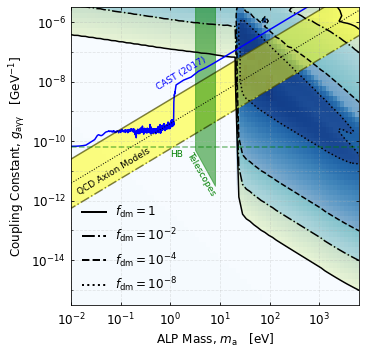

In [10]:
fig,ax=plt.subplots(1,1,figsize=(6,5))
label_size = 12
title_size = 12
legend_size = 25
handle_length = 1.5





levels = [-8,-4,-2,0]


colormap = plt.cm.Oranges #or any other colormap
colormap2 = plt.cm.Blues_r
colormap2 = colormap2
normalize = matplotlib.colors.Normalize(vmin=-10, vmax=0)



CS = ax.contour(Xf_gagg, Yf_gagg_new, Zf_gagg_with_edges_with_pca,
                levels,norm=normalize,
                linestyles=[':','--','-.','-'],
                colors=['k','k']
               )
CS = ax.contourf(Xf_gagg, Yf_gagg_new, Zf_gagg_with_edges_with_pca,
                levels,extend='min',#,colors=['w','orange'],
                 alpha=0.2)




ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=2)
ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=2)
ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=3,labelsize=label_size,pad=5)
ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=3,labelsize=label_size,pad=7)



ax.grid( b=True, which="both", alpha=0.3, linestyle='--')





ax.set_xlabel("ALP Mass, "+r'$m_\mathrm{a}\quad[\mathrm{eV}]$',size=title_size)
ax.set_ylabel("Coupling Constant, "+r'$g_\mathrm{a\gamma\gamma}\quad[\mathrm{GeV}^{-1}]$',size=title_size)


ax.yaxis.set_label_coords(-.15,0.5)
ax.xaxis.set_label_coords(0.5,-.09)



ax.patch.set_color(colormap2(0.99)) # or whatever color you like

ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.set_xticklabels([r'$10^{-2}$',r'$10^{-1}$',r'$10^{0}$',r'$10^{1}$',r'$10^{2}$',r'$10^{3}$',r'$10^{4}$'])
ax.set_yticklabels([r'$10^{-16}$',r'$10^{-14}$',r'$10^{-12}$',r'$10^{-10}$',r'$10^{-8}$',r'$10^{-6}$'])
CAST = np.loadtxt('/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/cast_env_2016.dat')
m_cast = CAST[:,0]
gagg_cast = CAST[:,1]
ax.plot(np.log10(m_cast)[:-1],np.log10(gagg_cast)[:-1],c='blue',ls='-',lw=1.5)



xinj_values = 10**mX_values/xinj_to_mass


mass_in_eV = np.logspace(-11,9,100)
xinj_am = mass_in_eV/xinj_to_mass

E_over_N_minus_bla = 5./3. - 1.949
def f_p(m):
    return (3.4718e24/(E_over_N_minus_bla)**2.)*m**-5

tau = []
for m in mass_in_eV:
    tau.append(f_p(m))
tau_low = np.asarray(tau)
gamma_low = 1./tau_low

E_over_N_minus_bla = 44./3. - 1.949
def f_p(m):
    return (3.4718e24/(E_over_N_minus_bla)**2.)*m**-5

tau = []
for m in mass_in_eV:
    tau.append(f_p(m))
tau_high = np.asarray(tau)
gamma_high = 1./tau_high

ax.plot(np.log10(mass_in_eV),np.log10(g_agg(gamma_high,xinj_am)),ls='-',c='k',alpha=0.5)
ax.plot(np.log10(mass_in_eV),np.log10(g_agg(gamma_low,xinj_am)),ls='-.',c='k',alpha=0.5)
ax.fill_between(np.log10(mass_in_eV),np.log10(g_agg(gamma_high,xinj_am)),np.log10(g_agg(gamma_low,xinj_am)),
                color='yellow',alpha=0.5)


tau_ksvz = 8.9078e23*mass_in_eV**-5
gamma_ksvz = 1./tau_ksvz

ax.plot(np.log10(mass_in_eV)[(np.log10(mass_in_eV)>-6.6) & (np.log10(mass_in_eV)<-5.9)],
        np.log10(g_agg(gamma_ksvz,xinj_am))[(np.log10(mass_in_eV)>-6.6) & (np.log10(mass_in_eV)<-5.9)],
        c='k',lw=1,ls=':')

ax.plot(np.log10(mass_in_eV)[np.log10(mass_in_eV)>-3.5],
        np.log10(g_agg(gamma_ksvz,xinj_am))[np.log10(mass_in_eV)>-3.5],
        c='k',lw=1,ls=':')





xinj_values = 10**mX_values/xinj_to_mass
gamma = 1e-5
np.log10(g_agg(gamma,xinj_values))


im = ax.imshow(Zf_gagg_with_edges_with_pca, 
                extent=[ma_values[0],
                        ma_values[-1],
                        gagg_values[0],
                        
                        gagg_values[-1]],
               #origin='lower',
               cmap=colormap2,norm=normalize, 
               alpha=1.,
               aspect=0.6
              )


custom_lines = [Line2D([0], [0], color='k', lw=2,ls='-'),
                Line2D([0], [0], color='k', lw=2,ls='-.'),
                Line2D([0], [0], color='k', lw=2,ls='--'),
                Line2D([0], [0], color='k', lw=2,ls=':'),
               ]
ax.legend(custom_lines, [r'$f_\mathrm{dm}=1$', 
                         r'$f_\mathrm{dm}=10^{-2}$', 
                         r'$f_\mathrm{dm}=10^{-4}$',
                         r'$f_\mathrm{dm}=10^{-8}$',
                        #r'Age of the Universe'
                        ],loc=3,
        fontsize=12,
         frameon = False,
          ncol = 1,
         facecolor='grey',framealpha=0.2)




ax.text(-1.9,-10.18, r'QCD Axion Models' , rotation = 31,
        fontsize=9, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='yellow',edgecolor='none', alpha=0.))



ax.text(-0.3,-7.1, r'CAST (2017)' , rotation = 31,
        fontsize=9, color='blue',
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='yellow',edgecolor='none', alpha=0.))



ax.axhline(-10.2,c='green',ls='--',alpha=0.5)


ax.text(0.,-10.3, r'HB' , rotation = 0,
        fontsize=9, color='green',
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='yellow',edgecolor='none', alpha=0.))

ax.text(0.3,-10.3, r'Telescopes' , rotation = -60,
        fontsize=9, color='green',
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='yellow',edgecolor='none', alpha=0.))



ax.fill_between(np.linspace(0.5,0.9,2),np.linspace(-10.3,-11.5,2),-5,color='green',alpha=0.5)

ax.set_ylim(-15.5,-5.5)
ax.set_xlim(-2,3.8)

fig.tight_layout()



name_ext = ''
case = 'lyc+reio'
if case == 'lyc+reio':
    name_ext += '_lyc_reio'
elif case == 'bare':
    name_ext += '_bare'
if add_edges == 'yes':
    name_ext += '_with_edges'
else:
    name_ext += '_no_edges'
name_ext += '_extended_run'
name_ext += '_zoomed.pdf'


#plt.savefig(path_to_figures + '/figures_gagg_' + name_ext)